In [1]:
import matplotlib.pyplot as plt

# Tọa độ các điểm
points = {
    'A': (0, 0),
    'B': (0, 1),
    'C': (1, 0),
    'D': (1, 1),
    'E': (5, 5)
}

In [2]:
# Các điểm thuộc cụm 1 (core points) và điểm noise
core_points = ['A', 'B', 'C', 'D']
noise_points = ['E']

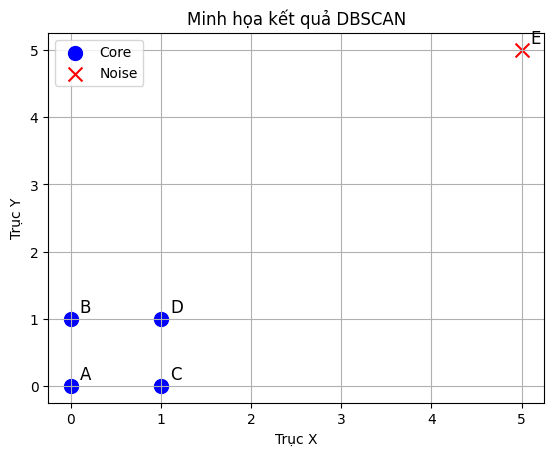

In [5]:
# Vẽ các core point
for pt in core_points:
    plt.scatter(points[pt][0], points[pt][1], color='blue', s=100,
                label='Core' if pt == 'A' else "")
    plt.text(points[pt][0] + 0.1, points[pt][1] + 0.1, pt, fontsize=12)

# Vẽ noise
for pt in noise_points:
    plt.scatter(points[pt][0], points[pt][1], color='red', marker='x', s=100,
                label='Noise' if pt == 'E' else "")
    plt.text(points[pt][0] + 0.1, points[pt][1] + 0.1, pt, fontsize=12)

plt.xlabel('Trục X')
plt.ylabel('Trục Y')
plt.title('Minh họa kết quả DBSCAN')
plt.legend()
plt.grid(True)
plt.show()
